In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import imread, gaussian_filter

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [2]:
def lineout(data, start, stop):
    length=np.sqrt((stop[0]-start[0])**2+(stop[1]-start[1])**2)
    xs, ys=np.linspace(start[0], stop[0], length), np.linspace(start[1], stop[1], length)
    lineout = data[xs.astype(np.int), ys.astype(np.int)]
    return lineout

def band_pass(data, low_sigma, hi_sigma):
    data=np.sum(data,2)
    low_pass=gaussian_filter(data, low_sigma)
    norm=data/low_pass.astype(float)
    hi_pass=gaussian_filter(norm, hi_sigma)
    return hi_pass

In [3]:
cd "/Users/jdhare/Google Drive/MAGPIE/data/2015/s1006_15 Reconnection C TS upstream flow"

/Users/jdhare/Google Drive/MAGPIE/data/2015/s1006_15 Reconnection C TS upstream flow


In [120]:
plas = imread('s1006_15 532nm end on interferometry (2).JPG')
plas_rough=np.sum(plas,2)
plas = band_pass(plas, 50,5)
vac = imread('s1006_15 532nm end on interferometry (1).JPG')
vac_rough=np.sum(vac,2)
vac = band_pass(vac, 50,5)

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:10: RuntimeWarning: divide by zero encountered in true_divide
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:10: RuntimeWarning: invalid value encountered in true_divide


/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/matplotlib/pyplot.py:424: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


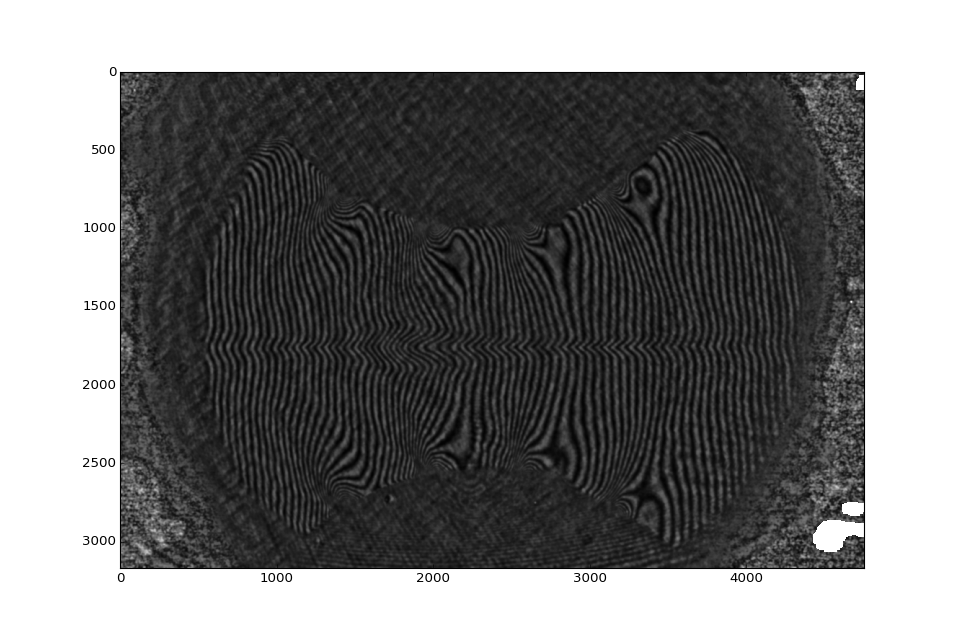

In [130]:
fig, ax=plt.subplots(figsize=(12,8))
im=ax.imshow(plas, cmap='Greys_r', interpolation='none')

In [5]:
#s1006_15 TS C upstream
scale=int(4752/2352.0) #in this shot the pin positions were taken low res....
f2=(1035,1002)
f4=(1062,1065)
f7=(1107,1182)
f10=(1155,1284)
f12=(1182,1359)

dy=f12[0]-f2[0]
dx=f12[1]-f2[1]
y0=f2[0]-2*dy/10.0
x0=f2[1]-2*dx/10.0
y=lambda f: scale*int(f*dy/10.0+y0)
x=lambda f: scale*int(f*dx/10.0+x0)

In [66]:
#s1008_15 TS Al outflow
f2=(1612,1716)
f4=(1656,1840)
f7=(1756,2068)
f10=(1852,2304)
f12=(1904,2428)
dy=f12[0]-f2[0]
dx=f12[1]-f2[1]
y0=f2[0]-2*dy/10.0
x0=f2[1]-2*dx/10.0
y=lambda f: int(f*dy/10.0+y0)
x=lambda f: int(f*dx/10.0+x0)

(2422, 2860)
43.5 40.5 -1.26e+18


/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/matplotlib/pyplot.py:424: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


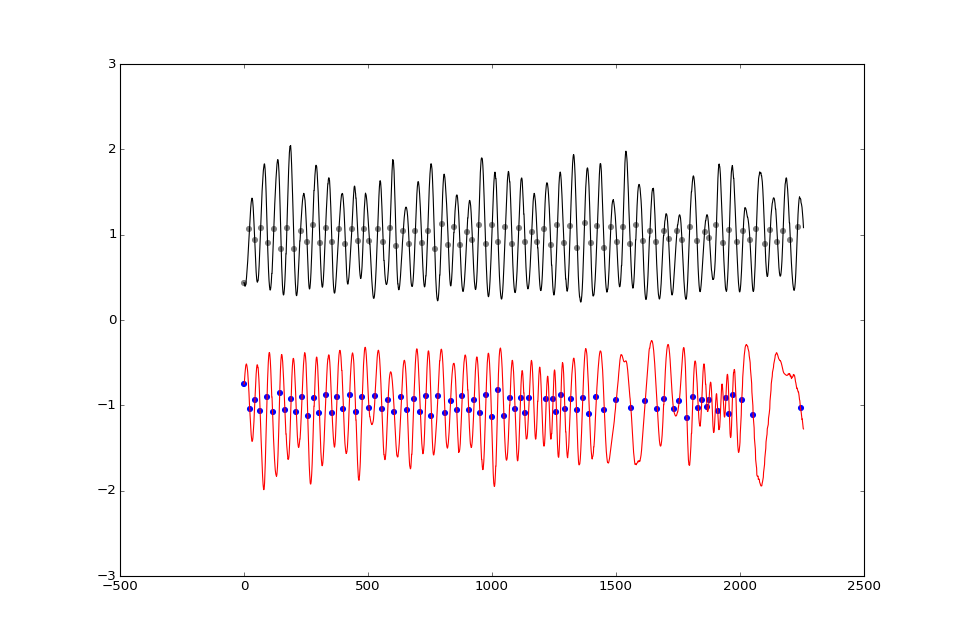

In [160]:
f=14
start_h=(1990,644)#(y(1),x(1))
stop=(y(f),x(f))
print(stop)

lov=lineout(vac, start_h, stop)
lop=lineout(plas, start_h, stop)
peaks_v, locs_v=peak_count(lov, window=20)
peaks_p, locs_p=peak_count(lop, window=20)
One_Fringe=4.2e17
FS=(peaks_p-peaks_v)
neL=FS*One_Fringe
print(peaks_v,peaks_p, neL)
fig, ax=plt.subplots(figsize=(12,8))
ax.plot(lov, color='black')
ax.scatter(locs_v, lov[locs_v], color='gray')
ax.plot(-lop, color='red')
ax.scatter(locs_p, -lop[locs_p], color='blue')

In [73]:
One_Fringe=4.2e17
Fringe_vac=30
Fringe_plas=32.5
(Fringe_plas-Fringe_vac)*One_Fringe

1.05e+18

In [126]:
#Probab;y the best so far.
def peak_count(data):
    m=data.mean()
    upper=m*1.1
    lower=m*0.9
    low_peak=0
    hi_peak=0
    in_peak=False
    locs=[]
    for din, d in enumerate(data):
        if d>upper and in_peak is False:
            hi_peak=hi_peak+1
            locs.append(din)
            in_peak=True
        if d<upper and d>lower and in_peak is True:
            in_peak=False
        if d<lower and in_peak is False:
            low_peak=low_peak+1
            locs.append(din)
            in_peak=True
    return (low_peak+hi_peak+1.0)/2.0, locs

In [134]:
start_h=(2095,638)#(y(1),x(1))
One_Fringe=4.2e17
neLs=[]

for f in range(14):
    f=f+1
    stop=(y(f),x(f))
    lov=lineout(vac, start_h, stop)
    lop=lineout(plas, start_h, stop)
    peaks_v, locs_v=peak_count(lov)
    peaks_p, locs_p=peak_count(lop)
    FS=(peaks_p-peaks_v)
    neL=FS*One_Fringe
    neLs.append(neL/1e17)
    print(FS, neL)

2.0 8.4e+17
2.0 8.4e+17
2.0 8.4e+17
2.0 8.4e+17
2.0 8.4e+17
1.0 4.2e+17
1.0 4.2e+17
1.5 6.3e+17
2.0 8.4e+17
3.5 1.47e+18
3.0 1.26e+18
2.5 1.05e+18
2.0 8.4e+17
1.0 4.2e+17


In [159]:
def moving_std(data, window=20):
    std=[]
    for din, d in enumerate(data):
        lower=din-window
        upper=din+window
        if lower<0:
            lower=0
        if upper>data.size:
            upper=-1
        std.append(np.std(data[lower:upper]))
    return std

def peak_count(data, window=50):
    m=data.mean()
    std=moving_std(data, window)
    low_peak=0
    hi_peak=0
    in_peak=False
    locs=[]
    for din, d in enumerate(data):
        upper=m+0.1*std[din]
        lower=m-0.1*std[din]
        if d>upper and in_peak is False:
            hi_peak=hi_peak+1
            locs.append(din)
            in_peak=True
        if d<upper and d>lower and in_peak is True:
            in_peak=False
        if d<lower and in_peak is False:
            low_peak=low_peak+1
            locs.append(din)
            in_peak=True
    return (low_peak+hi_peak+1.0)/2.0, locs

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/matplotlib/pyplot.py:424: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


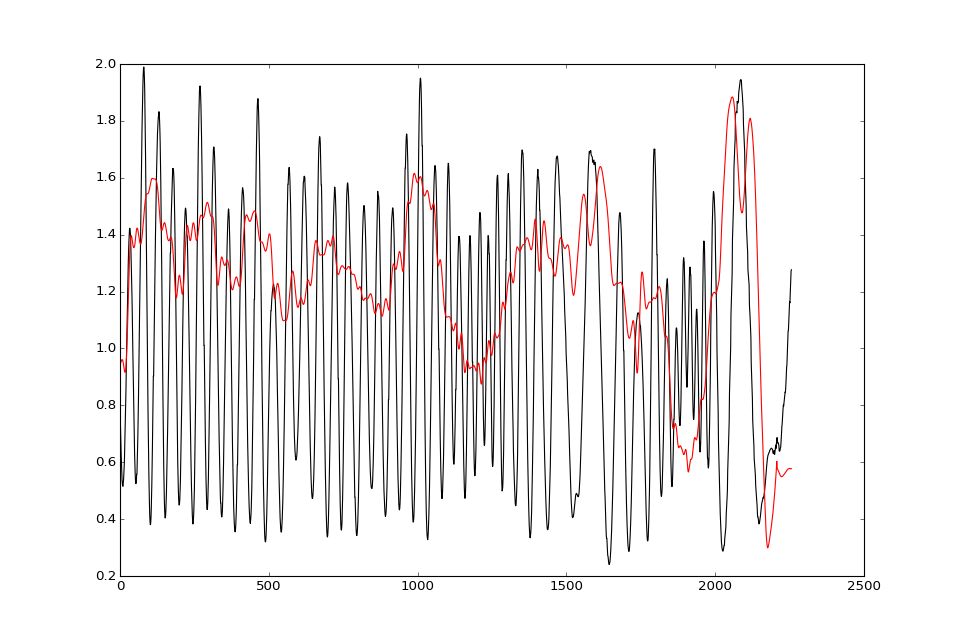

In [149]:
mst=moving_std(lop, window=50)
fig, ax=plt.subplots(figsize=(12,8))
ax.plot(lop, color='black')
ax.plot(np.array(mst)*3, color='red')


In [155]:
mstd

[0.16140621573467148,
 0.17931639182479997,
 0.1985157102735845,
 0.21739847321098862,
 0.23593694593934822,
 0.25407390368168592,
 0.27172746782761081,
 0.28879205653718226,
 0.30553227564733576,
 0.32125088211018088,
 0.33581872950595804,
 0.34908544953981707,
 0.36089183450680934,
 0.37113272404773023,
 0.37959082336035227,
 0.38618610154014671,
 0.39088567746138331,
 0.3937156160202106,
 0.39472944973658053,
 0.39413433142175369,
 0.39215916336939066,
 0.38629393516425659,
 0.3787389154503969,
 0.36909100557450691,
 0.35801439181709488,
 0.34626311623866129,
 0.33464607244219557,
 0.32384034824912794,
 0.31472461768687526,
 0.30795224898118662,
 0.30393425492530207,
 0.30282356286562717,
 0.30470968070583593,
 0.30905835956436922,
 0.31521686021942574,
 0.32265554654906303,
 0.33071961352657347,
 0.33900615185857524,
 0.34770328341606394,
 0.35549223947449399,
 0.36205287356955962,
 0.3670858096700968,
 0.37036567515858981,
 0.37184552314778785,
 0.37156779234577963,
 0.36976200224